# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [1]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [2]:
data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

**Step 3:** Write the data to a csv file.

In [3]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [1]:
import pandas as pd

data = pd.read_csv('google.csv')
print(data.head())

        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [2]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open   Close    Volume
0     0   98.80  101.46  15860692
1     1  100.77   97.35  13762396
2     2   96.82   96.85   8239545
3     3   97.72   94.37  10389803
4     4   95.42   97.02   9666175
---
      Item    Open   Close   Volume
3140  3140  990.00  972.09  1517912
3141  3141  961.60  948.09  2443602
3142  3142  950.66  961.01  2745568
3143  3143  951.35  937.82  3206674
3144  3144  943.99  929.68  2287662


**Step 2: ** Visualise raw data.

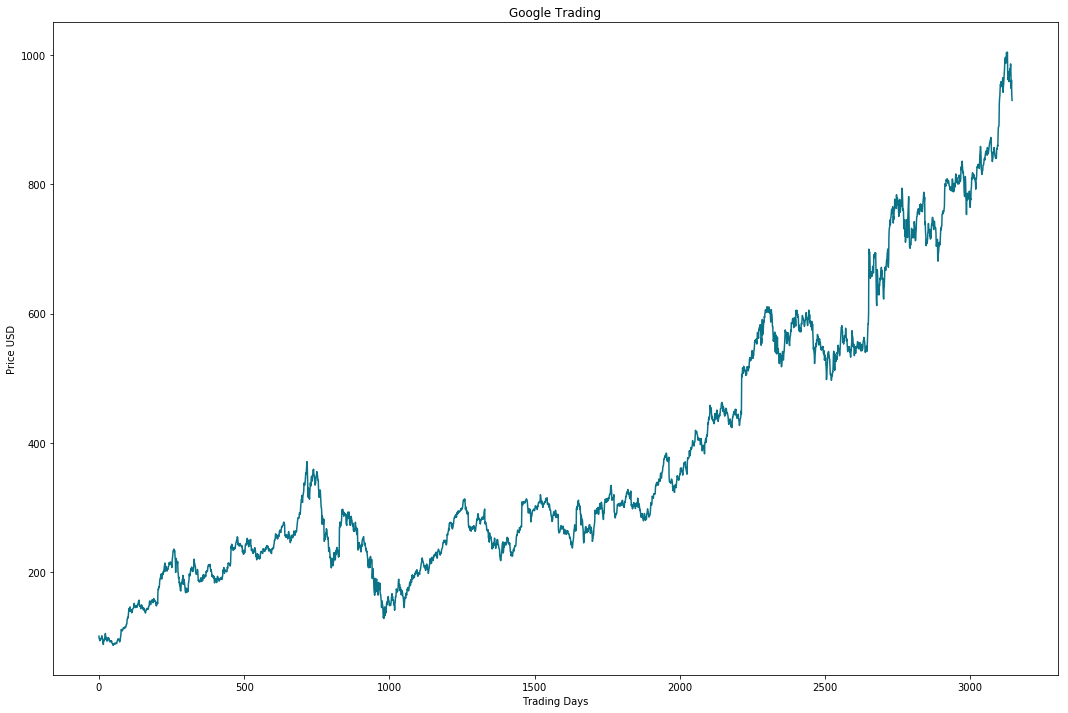

In [3]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [4]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

   Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905


**Step 4 :** Visualize the data again

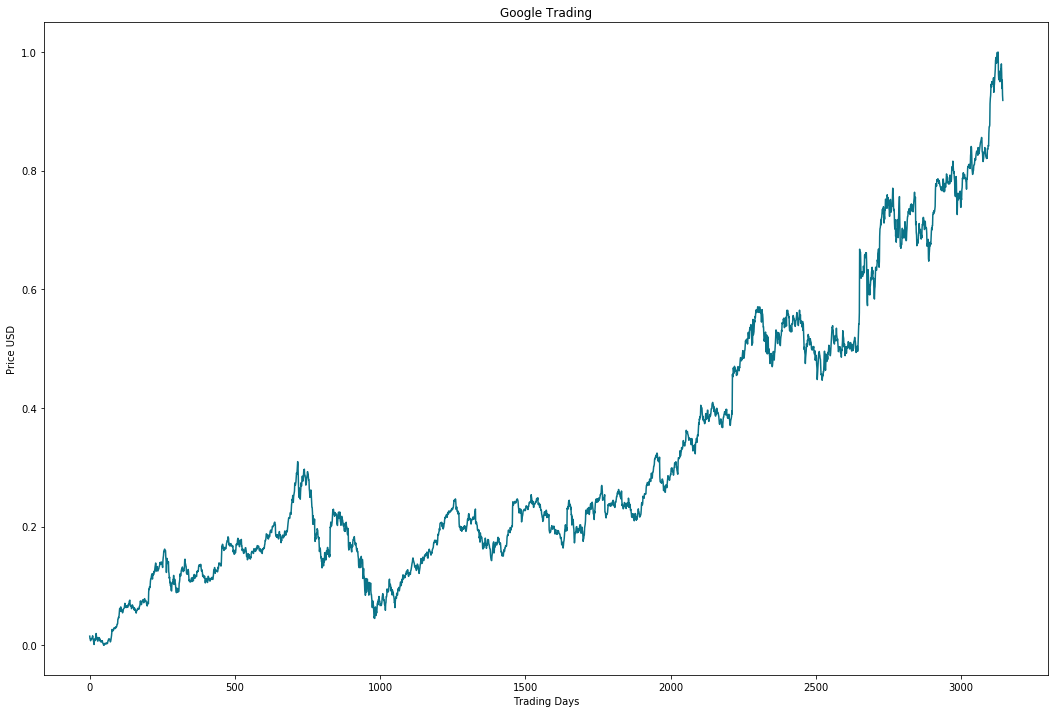

In [5]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [6]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905


**Step 2:** Split data into train and test pair

In [2]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [3]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [4]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

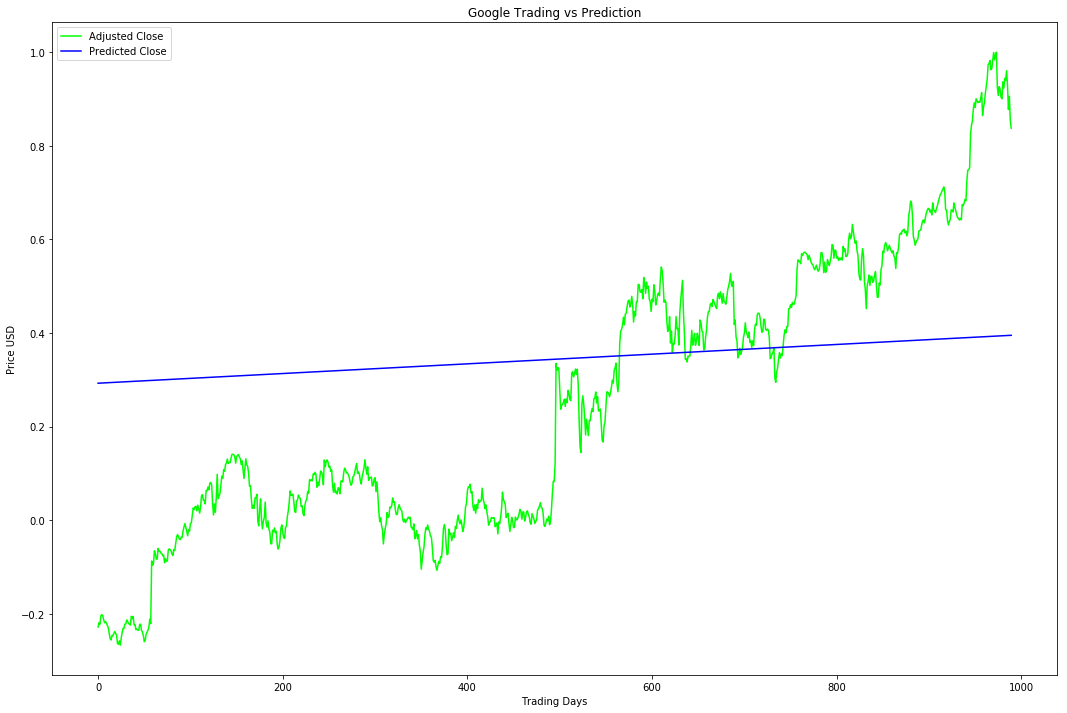

In [5]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [6]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Using TensorFlow backend.


,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [2]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [3]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.06404256820678711


**Step 4:** Train the model

In [4]:
model.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=1,
    validation_split=0.05)

Train on 2459 samples, validate on 130 samples
Epoch 1/1
2459/2459 [==============================] - 326s - loss: 6.8425e-04 - val_loss: 0.0030


**Step 5:** make prediction using test data

In [5]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

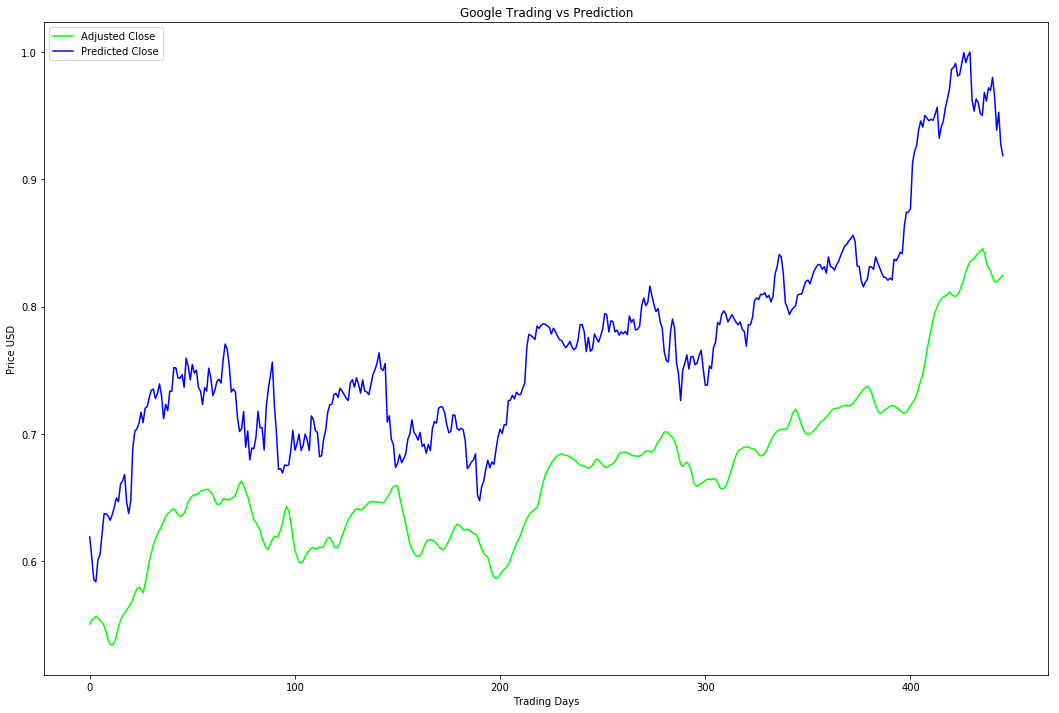

In [6]:
vs.plot_lstm_prediction(predictions, y_test)

** Step 7:** Get the test score.

In [7]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00089497 MSE (0.02991610 RMSE)
Test Score: 0.01153170 MSE (0.10738577 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [8]:
# Set up hyperparameters
batch_size = 512
epochs = 20

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.05653715133666992


**Step 2: ** Train improved LSTM model

In [9]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2459 samples, validate on 130 samples
Epoch 1/20
16s - loss: 0.0337 - val_loss: 0.0033
Epoch 2/20
14s - loss: 0.0082 - val_loss: 0.0044
Epoch 3/20
15s - loss: 0.0034 - val_loss: 0.0213
Epoch 4/20
17s - loss: 0.0034 - val_loss: 0.0029
Epoch 5/20
29s - loss: 0.0016 - val_loss: 0.0011
Epoch 6/20
27s - loss: 0.0013 - val_loss: 0.0013
Epoch 7/20
28s - loss: 0.0011 - val_loss: 0.0025
Epoch 8/20
29s - loss: 9.1846e-04 - val_loss: 2.8458e-04
Epoch 9/20
28s - loss: 8.4572e-04 - val_loss: 3.7569e-04
Epoch 10/20
26s - loss: 7.2546e-04 - val_loss: 7.6022e-04
Epoch 11/20
26s - loss: 7.7382e-04 - val_loss: 4.8439e-04
Epoch 12/20
30s - loss: 7.3297e-04 - val_loss: 2.8472e-04
Epoch 13/20
37s - loss: 6.8574e-04 - val_loss: 4.5429e-04
Epoch 14/20
31s - loss: 6.5911e-04 - val_loss: 5.3648e-04
Epoch 15/20
30s - loss: 6.5777e-04 - val_loss: 2.9400e-04
Epoch 16/20
29s - loss: 6.5445e-04 - val_loss: 3.8651e-04
Epoch 17/20
31s - loss: 6.4016e-04 - val_loss: 3.1511e-04
Epoch 18/20
30s - loss: 6.4076e-

**Step 3:** Make prediction on improved LSTM model

In [10]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

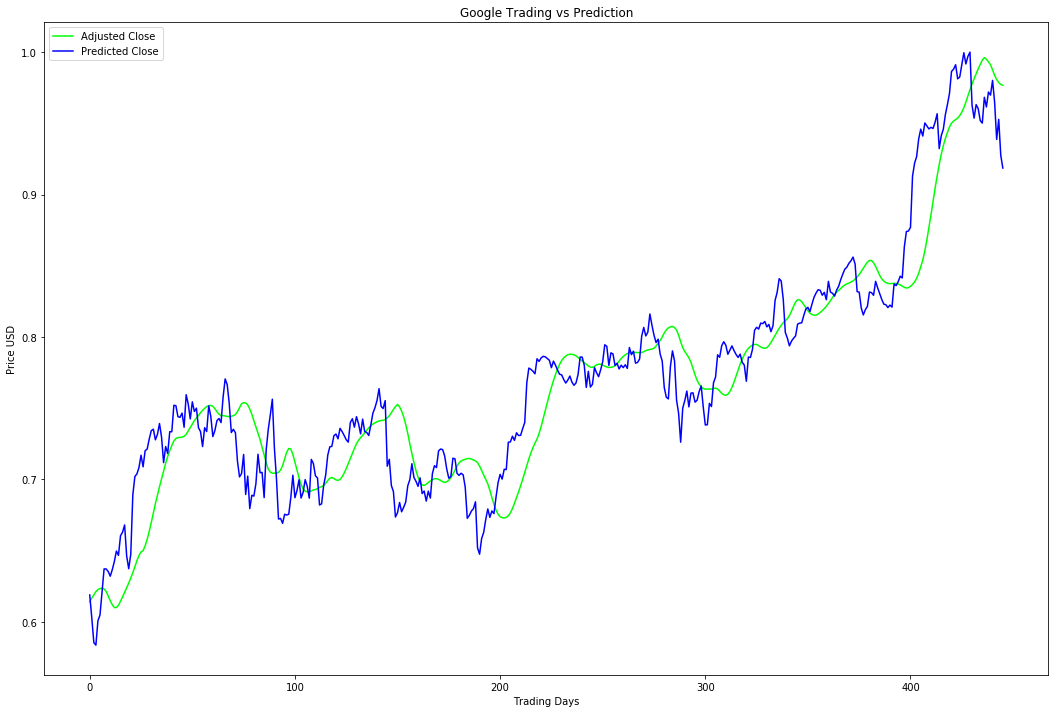

In [11]:
vs.plot_lstm_prediction(predictions, y_test)

**Step 5:** Get the test score

In [13]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00032478 MSE (0.01802172 RMSE)
Test Score: 0.00093063 MSE (0.03050625 RMSE)


In [14]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000931 - RMSE * Adjusted Close Range
